
# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint



## Learning Objective

At the end of the experiment, you will be able to:

*   Visualize the high-dimensional data (3D) to low-dimensional data (2D) by applying t-SNE algorithm 
*    Understand how introduction of noise into data effects representation of data





In [1]:
#@title Experiment Explanation Video
from IPython.display import HTML

HTML("""<video width="800" height="300" controls>
  <source src="https://cdn.talentsprint.com/aiml/AIML_BATCH_HYD_7/Feb10/t_sne.mp4" type="video/mp4">
</video>
""")

## Dataset 

### Description

The dataset choosen for this experiment is swissroll.

## Domain Information

Swiss Roll is a curled surface, where the distance between the points along the surface of the roll and direct distance is different.

If we just projected a 2D plane onto a 3D space it would simply squash the various layers together and lose all the information like geometry and similarity between points. we wanted to capture. Instead, what we want is to unroll the Swiss roll, to obtain a 2D data set,  without much loss of information. This approach is Manifold Learning.


Manifold Learning is when we bend and twist a high-dimensional space such that it can be mapped to a lower-dimensional space. It ensures that the optimal manifold is found by reducing the dimensionality of our data set.



## AIML Technique


In this experiment, swiss roll data is high-dimensional dataset which is difficult to visualize. To aid visualization of the structure of the dataset, the dimension must be reduced in some way. One of the approaches to manifold learning, t-SNE  is a tool to visualize high-dimensional data by projecting it to low-dimensional data by converting similarities between data points to joint probabilities. These probabilities in the embedded space are represented by Student’s t-distributions. 

Generally,  t-SNE minimizes the divergence between two distributions: a distribution that measures pairwise similarities of the input objects in the higher dimension and the distribution that measures pairwise similarities of the corresponding low-dimensional points in the embedding.

 t-SNE maps the high-dimensional data to a low-dimensional space and attempts to find patterns in the data by identifying  clusters based on similarity of data points..

#### Keywords

* Manifold
* Swiss roll
* Non - linear Dimensionality reduction
* Geo desic distance

#### Expected Time to complete the experiment : 30 mins

### Setup Steps

In [0]:
#@title Please enter your registration id to start: (e.g. P181900101) { run: "auto", display-mode: "form" }
Id = "P181902118" #@param {type:"string"}


In [0]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "8860303743" #@param {type:"string"}


In [5]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook="BLR_M1W5E13_Tsne" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")  
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      print("Your submission is successful.")
      print("Ref Id:", submission_id)
      print("Date of submission: ", r["date"])
      print("Time of submission: ", r["time"])
      print("View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions")
      print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if Additional: return Additional      
    else: raise NameError('')
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getAnswer():
  try:
    return Answer
  except NameError:
    print ("Please answer Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
    from IPython.display import HTML
    HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id))
  
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


In [0]:
### importing the required packages
from sklearn.datasets import *
### Manifold is imported to access swiss roll dataset and the dimensionalityy reduction approach: t-SNE
from sklearn import manifold
import matplotlib.pyplot as plt

### Generate the swiss roll data

In [0]:
### Specify the number of data samples from swiss roll
n_samples = 1500
''''we use make_swiss_roll method which takes the number of data samples and 
returns the 3D coordinates of those data samples with the colors projected onto each sample
input is 1500 samples and output will be 1500 X 3'''
X, color = make_swiss_roll(n_samples)

In [9]:
X[0]

array([ 5.18066978,  3.52982383, -2.63563829])

NOTE: Let us examine the variables X and color

In [10]:
X.shape, color.shape

((1500, 3), (1500,))

As you can see above, each of the points in X is labelled with a color label in 'color' variable. Note that here we are not using the label for classification purpose, but only for plotting purpose

####  Now reduce the dimensions of data from higher to lower

In [0]:
'''we use TSNE technique from manifold which takes as input 
  the dimensions of the embedded space that the swiss roll data has to be transformed to'''
### We create an object of t-SNE class
### We are transforming and fitting the data to t-SNE by calculating the joint probabilites between the data points
tsne_data = manifold.TSNE(n_components=2).fit_transform(X)

### Visualization

#### Let us plot the data. In this we are going to see two plots, first plot represents swiss roll data and the second plot represents the reduced  data (reduced by t-SNE)

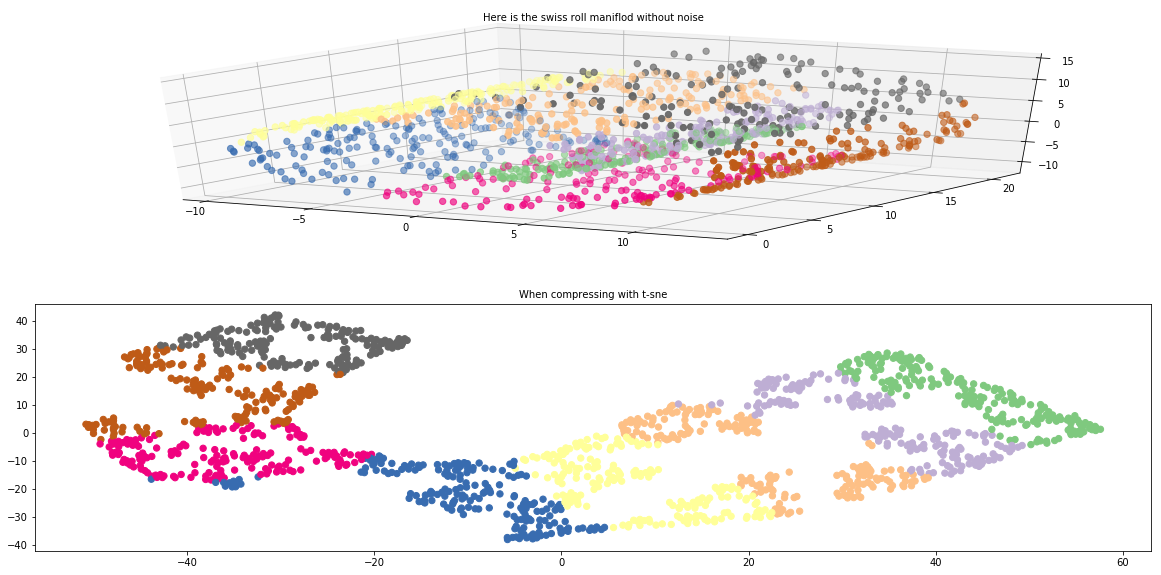

In [15]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(2, 1, 1,projection='3d')
ax.set_title('Here is the swiss roll maniflod without noise', fontsize=10)
ax.scatter(X[:,0],X[:,1],X[:,2],c = color,cmap="Accent",s=40)# we are picking up the x,y,z co-ordinate values from dataset X
ax = fig.add_subplot(2, 1, 2) 

#Now we plot the 2D dimensionality reduced data using TSNE
ax.set_title('When compressing with t-sne', fontsize=10)
ax.scatter(tsne_data[:,0],tsne_data[:,1],c = color,cmap="Accent",s=40)

#### Now let us generate swiss roll data for 300 samples with some noise in it

In [0]:
''' make_swiss_roll allows you to pass range of noisy samples along with n_samples 
where the range of noise affects the variance around data samples'''
noise = 0.01*200 
n_samples = 300
ndata,colors = make_swiss_roll(n_samples,noise)

#### Let's concatenate the noise data values and original data values

In [0]:
import numpy as np
con_data =  np.concatenate((X, ndata), axis=0)
con_colors = np.concatenate((color,colors),axis=0)

In [0]:
'''con_data has 300 additional samples that have been generated by make_swiss_roll with noise'''
### We create an object of Isomap class
### We are fitting and transforming the noisy data to t-SNE by calculating the joint probabilites between the data points
tsne_data = manifold.TSNE(n_components=2).fit_transform(con_data)

#### Let us plot the data. In this we are going to see two plots, first plot represents noisy swiss roll data with noise and the second plot represents the reduced noisy data (reduced by t-SNE)

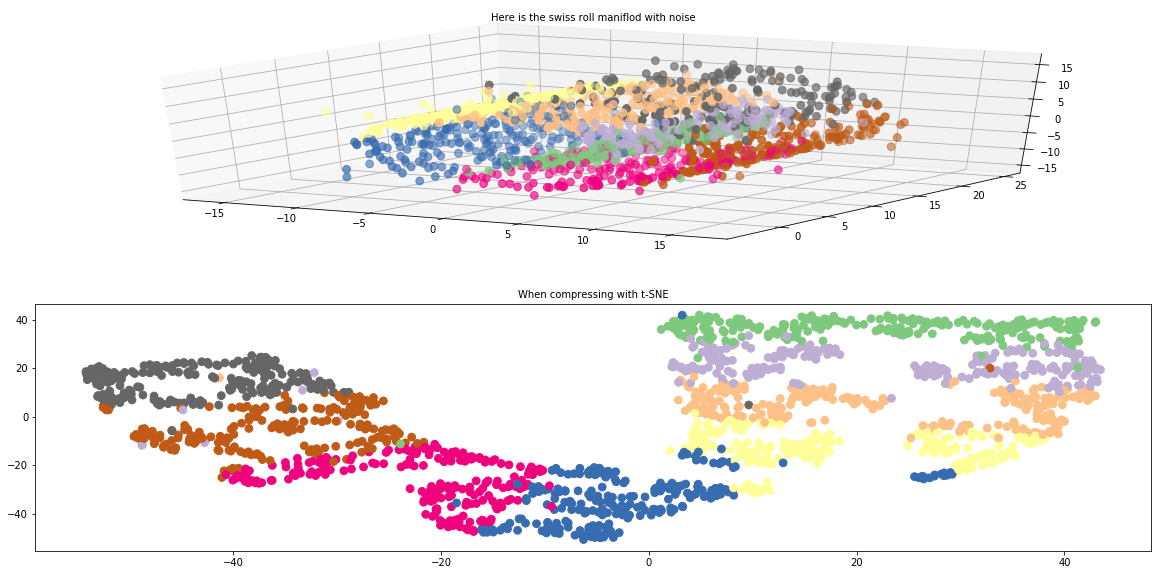

In [19]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(2, 1, 1,projection='3d')
ax.set_title('Here is the swiss roll maniflod with noise', fontsize=10)
ax.scatter(con_data[:,0],con_data[:,1],con_data[:,2],c = con_colors,cmap="Accent",s=60)
ax = fig.add_subplot(2, 1, 2) 

#2D Plot below
ax.set_title('When compressing with t-SNE', fontsize=10)
ax.scatter(tsne_data[:,0],tsne_data[:,1],c = con_colors,cmap="Accent",s=60)

### You are encouraged to compare this with ISOMAP Experiment (after executing it) and check if TSNE is better resistant to noise when compared with ISOMAP.

#### Summary

t-SNE to be particularly sensitive to local structure, revealing data that lie in multiple, different, manifolds or clusters and reduces the tendency to crowd points together at the center.  Notice that it is very robust to noise and other distortions, and hence is widely used for visualization purposes.

### Please answer the questions below to complete the experiment:




In [0]:
#@title TSNE differs from ISOMAP in that it uses probabilities?  { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "FALSE" #@param ["TRUE", "FALSE"]


In [0]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging me" #@param ["Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging me", "Was Tough, but I did it", "Too Difficult for me"]


In [0]:
#@title If it was very easy, what more you would have liked to have been added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "good" #@param {type:"string"}

In [0]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["Yes", "No"]

In [24]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 3730
Date of submission:  14 Apr 2019
Time of submission:  15:15:32
View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions
For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.
